# ***Title***: Project 4 - *Artificial Neural Network for Email Spam data*
## ***Author***: Ian R. Stewart
## ***Course***: COSC528 : Fall 2018

In [371]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random # Using to randomize initial weights
import time
import warnings
warnings.filterwarnings("ignore")

> #### **IMPORTING DATA**

In [2]:
inPath = './'
outPath = inPath+'Figures/'
features = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam class']
df = pd.read_csv(inPath+'spambase.data',names=features)

In [3]:
df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,1


## 1) Data Exploration

In [4]:
print 'dataframe shape:\t(%i,%i)'%(df.shape[0],df.shape[1])
np.round(df.describe(),2)

dataframe shape:	(4601,58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
count,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,...,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00
mean,0.10,0.21,0.28,0.07,0.31,0.10,0.11,0.11,0.09,0.24,...,0.04,0.14,0.02,0.27,0.08,0.04,5.19,52.17,283.29,0.39
std,0.31,1.29,0.50,1.40,0.67,0.27,0.39,0.40,0.28,0.64,...,0.24,0.27,0.11,0.82,0.25,0.43,31.73,194.89,606.35,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.59,6.00,35.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,2.28,15.00,95.00,0.00
75%,0.00,0.00,0.42,0.00,0.38,0.00,0.00,0.00,0.00,0.16,...,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,266.00,1.00
max,4.54,14.28,5.10,42.81,10.00,5.88,7.27,11.11,5.26,18.18,...,4.38,9.75,4.08,32.48,6.00,19.83,1102.50,9989.00,15841.00,1.00


> **Checking for empty arrays in matrix.**

In [5]:
# Iterating through df, searching for .isnull().any()
count = 0; indexes = []
for i in df.isnull().any():
    if i == True:
        indexes.append(count)
    count+=1
if len(indexes)>0:
    print 'FEATURES WITH MISSING DATA: %s'%df.columns.values[indexes]
else:
    print 'NO MISSING DATA IN DATAFRAME.'

NO MISSING DATA IN DATAFRAME.


In [6]:
# Checking for negative values in dataset
for i in df:
    [j for j in df[i] if j < 0]

> **NO EMPTY data entries or NEGATIVE values in columns. Now, let's examine the data types for each data feature (column)**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

>**All features are either float64 or int64, which is ideal as an object return would require further investigation into the data feature to track down why Python is reading the column as a non-float or -int.**

> **After initial pruning of the data, I observed an odd behaviour where the majority of the data entries examined (at random) contained a 1.0 spam classification indicating that the email was, in fact, spam. I want to plot the data to look if all the data are in fact spam.**

Text(0.5,0,'Entry Index in Dataframe')

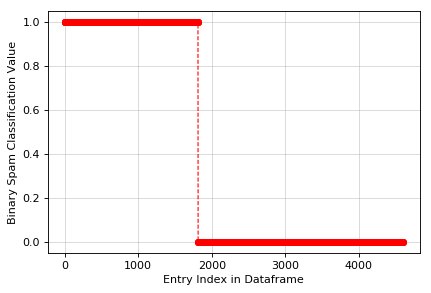

In [8]:
fig,ax = plt.subplots(dpi=80)
ax.plot(df['spam class'].values,'ro--',linewidth=1,markersize=5)
ax.grid(alpha=0.5)
ax.set_ylabel('Binary Spam Classification Value')
ax.set_xlabel('Entry Index in Dataframe')
#plt.savefig(outPath+'Initial_Classification_Investigation.png',dpi=400)

> **My hypothesis failed, where all data entries are assigned to one class (spam or non-spam). Let's count the spam classifications.**

In [9]:
print '[No. of Spam , No. of non-Spam]\t :  [%i , %i]'%(list(df['spam class']).count(0),list(df['spam class']).count(1))

[No. of Spam , No. of non-Spam]	 :  [2788 , 1813]


> **This shows that ~40% (1813/4601) of the data are classified as SPAM with the remaining ~60% (2788/4601) being non-SPAM. Another observation is that the classifications are actually grouped together, where the SPAM classifications are the FIRST 1813 entries and the latter portion of the dataframe are ALL non-SPAM classifications. This is an interesting finding, as a small training-test split for a cross-validation study can potentially cause classification errors if the an sufficient amount of each group is not represented in the training set.**

## 2) Data Analysis

Creating training-test split function for cross-validation study later.

### **Creating ANN class**

In [382]:
class ANN(object):
    import time
    '''
    ------------------------- DESCRIPTION ---------------------------
    ANN : artificial neural network using forward+backward propagation
    Description: The general flow of this ANN class is as follows:
            1. Split data into Training and Test set
        On training data, perform:
            2. Initialize weights for given number of hidden layers
            3. Forward propagate and calc output
            4. Back propagate errors
                a. reverse network
                b. calculate error between output layer
                c. calculate error for weights using
                    derivative of activation function
                d. update weights until input layer reached
            CONTINUE UNTIL CONVERGENCE OR ERROR RATE ADEQUATE
        On test data, perform:
            1. classification decision using training weights
    ------------------------------------------------------------------
    '''
    def __init__(self,data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate,printer=True):
        self.data = data
        self.n_inputs  = n_inputs
        self.n_hidden  = n_hidden
        self.n_neurons = n_neurons
        self.n_outputs = n_outputs
        self.learning_rate = learning_rate
        self.activation_func = 'sigmoid'
        self.printer = printer
        # Checking input value for activation function
        if (activation_func!='sigmoid')and(activation_func!='linear')and(activation_func!='softmax'):
            print 'Input value:\t%s'%activation_func
            print
            print 'CHOOSE CORRECT ACTIVIATION FUNCTION FROM LIST:\n1.\tsigmoid\n2.\tlinear\n3.\tsoftmax'
            print
        else:
            pass
      
    def test_split(self,data,n):
        '''
        :param data : { array } feature data
        :param n    : { int   } percentage of split in training
        '''
        data = np.asarray(data)
        length_test = int(round(len(data)*(n/100.)))
        
        # Create random integers between two numbers with no repeats
        train_list = random.sample(range(0,len(data)), length_test)
        train_list.sort()
        test_list = np.arange(0,len(data))
        test_list = np.delete(test_list,train_list)
        
        self.data_train = np.array(data[train_list]) ; #random.shuffle(self.data_train)
        self.data_test  = np.array(data[test_list])  ; #random.shuffle(self.data_test)
        if self.printer:
            print 'CHECK: Original data shape of (%i,%i) and splits shapes:\n\ttraining_data:\t(%i,%i)\n\ttest_data:\t(%i,%i)'\
                    %(data.shape[0],data.shape[1],self.data_train.shape[0],self.data_train.shape[1],\
                      self.data_test.shape[0],self.data_test.shape[1])
        return

    def initialize(self,number_inputs,number_hidden,number_neurons,number_outputs):
        '''
        Description : Initialize weights for constructed network. Weight values for the 
                        hidden layer weights contain a +1 value to account for the bias 
                        at each layer.
        
        :param number_inputs  : { int } number of inputs in input layer
        :param number_hidden  : { int } number of hidden layers in network
        :param number_neurons : { int } number of neurons in hidden layer
        :param number_outputs : { int } number of outputs in output layer
        '''
        network = []
        for i in range(number_hidden):
            # empty, initialize network
            if i==0:
                hidden_layer = [{'weights':[random.uniform(0, 1) for i in range(number_inputs + 1)]} for i in range(number_neurons)]
                network.append(hidden_layer) 
            # append after initializations
            else:
                hidden_layer = [{'weights':[random.uniform(0, 1) for i in range(number_neurons + 1)]} for i in range(number_neurons)]
                network.append(hidden_layer)
        output_layer = [{'weights':[random.uniform(0, 1) for i in range(number_neurons + 1)]} for i in range(number_outputs)]
        network.append(output_layer)
        return network
    
    def activate(self,weights,inputs):
        '''
        activate : neuron activation function calculated
                    by the weighted sum of inputs plus bias.
                    Bias is positioned to final value in the list.
        '''
        activation = weights[-1] # initialize 
        #print len(weights),len(inputs)
        for i in range(len(weights)-1):
            activation = activation + weights[i] * inputs[i]
        return activation

    def activation_function(self,value,values=None):
        '''
        activation_function : activation function for weight calc
        '''
        if (self.activation_func=='sigmoid') or (self.activation_func=='logistic sigmoid'):
            return (1.0 + np.exp(-value))**-1
        if self.activation_func=='linear':
            return value
        if self.activation_func=='softmax':
            return np.exp(value)/np.sum(values)
    
    def activation_derivative(self,value):
        '''
        activation_derivative : derivative of activation function
        '''
        if (self.activation_func=='sigmoid') or (self.activation_func=='logistic sigmoid'):
            return value*(1.0 - value)
        if self.activation_func=='linear':
            return 1.0
        if self.activation_func=='softmax':
            return value * (1.0 - value)
        
    def forward(self,network,values):
        '''
        forward : forward propagation of weights through network
        '''
        inputs = values
        for layer in network:
            new_inputs = []
            for neuron in layer:
                activation = self.activate(neuron['weights'], inputs)
                neuron['output'] = self.activation_function(activation)
                new_inputs.append(neuron['output'])
            inputs = new_inputs
        return inputs
    
    def backward(self,network,known):
        '''
        backward : backward propagation of errors through network
                    calculated with known/given network values
        '''
        for i in range(len(network))[::-1]:
            current_layer = network[i]; errors = []
            # initialize errors for output layer
            if i == len(network)-1:
                for j in range(len(current_layer)):
                    neuron = current_layer[j]
                    errors.append(self.expected[j] - neuron['output'])
            # calculate errors once output layer finished
            else:
                for j in range(len(current_layer)):
                    error = float(0)
                    # calculate error between i and i+1 layer
                    for neuron in network[i+1]:
                        weight = neuron['weights'][j]
                        error  = error + weight * neuron['error']
                    errors.append(error)
            # append dictionary with updated error correction                  
            for j in range(len(current_layer)):
                neuron = current_layer[j]
                neuron['error'] = errors[j] * self.activation_derivative(neuron['output'])
        return
    

    def update_weights(self,network, row, learning_rate):
        '''
        update_weights : updates weights using stochastic gradient descent
        '''
        for i in range(len(network)):
            inputs = row[:-1]
            if i != 0:
                inputs = [neuron['output'] for neuron in network[i - 1]]
            for neuron in network[i]:
                for j in range(len(inputs)):
                    neuron['weights'][j] = neuron['weights'][j] + learning_rate * neuron['error'] * inputs[j]
                neuron['weights'][-1] = neuron['weights'][-1] + learning_rate * neuron['error']
        self.network = network
        return network
        
    def main(self,split,n_epochs):
        '''
        train : runs ANN with provided network structure and updates weights along the way
        '''
        self.test_split(self.data,split)
        network = self.initialize(self.n_inputs,self.n_hidden,self.n_neurons,self.n_outputs)
        self.n_inputs = self.n_inputs-1
        #print np.array(network).shape
        error_dict = {}
        # --- TRAINING NETWORK --- #
        start = time.time()
        end = 0
        checker = True
        for epoch in range(n_epochs):
            total_error = float(0)
            count_pos = 0 ; count_neg = 0
            for row in self.data_train:
                #print row
                outputs = self.forward(network, row)
                self.expected = np.zeros(self.n_outputs)
                self.expected[row[-1]] = 1
                #print self.expected,outputs # *******Test this output comparison********
                #print len(self.expected),len(outputs),outputs
                for i in range(len(self.expected)):
                    ex = list(self.expected)
                    out= list(outputs)
                    if ex.index(max(ex)) == out.index(max(out)):
                        count_pos += 1
                    else:
                        count_neg += 1
                total_error = total_error + sum([(self.expected[i]-outputs[i])**2 for i in range(len(self.expected))])
                self.backward(network, self.expected)
                self.update_weights(network, row,self.learning_rate)
            error_value = float(count_pos)/float(count_pos+count_neg)
            if checker:
                end = time.time() ; delta = end-start
                checker = False
            else:
                now = time.time() - end
                end = end + now ; delta = end-start
            if self.printer:
                print 'epoch: %i  \terror: %.4f\ttime: %.1f   (seconds)'%(epoch+1,total_error,delta)
            error_dict[epoch+1] = total_error
            
        # --- MAKE PREDICTIONS --- #
        predicted_values = []
        for row in np.array(self.data_test):
            outputs = self.forward(self.network, row)
            #print row[-1],outputs
            predicted_values.append(outputs)

        return error_dict,predicted_values

## Running created ANN Class

Training network on dataset with 57 features and 2 outputs. The number of hidden layers and the number of neurons per hidden layer are variable. I start by ***NORMALIZING*** the dataframe.

In [445]:
# Normalizing the dataframe
df_norm = (df - df.mean()) / (df.max() - df.min())

# ANN(data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate)
X = ANN(df_norm, #data
        57,  # number of inputs
        2,   # number of hidden layers
        2,   # number of neurons per hidden layer
        2,   # number of outputs (2)
        'sigmoid', # activation function
        0.5, # learning rate
        printer=True)
total_error,outputs = X.main(60,25)

CHECK: Original data shape of (4601,58) and splits shapes:
	training_data:	(2761,58)
	test_data:	(1840,58)
epoch: 1  	error: 12.1239	time: 0.5   (seconds)
epoch: 2  	error: 0.6099	time: 1.0   (seconds)
epoch: 3  	error: 0.3449	time: 1.5   (seconds)
epoch: 4  	error: 0.2400	time: 2.0   (seconds)
epoch: 5  	error: 0.1837	time: 2.5   (seconds)
epoch: 6  	error: 0.1486	time: 3.0   (seconds)
epoch: 7  	error: 0.1246	time: 3.5   (seconds)
epoch: 8  	error: 0.1072	time: 4.0   (seconds)
epoch: 9  	error: 0.0940	time: 4.5   (seconds)
epoch: 10  	error: 0.0837	time: 5.0   (seconds)
epoch: 11  	error: 0.0754	time: 5.5   (seconds)
epoch: 12  	error: 0.0685	time: 6.0   (seconds)
epoch: 13  	error: 0.0628	time: 6.5   (seconds)
epoch: 14  	error: 0.0580	time: 6.9   (seconds)
epoch: 15  	error: 0.0538	time: 7.4   (seconds)
epoch: 16  	error: 0.0502	time: 7.9   (seconds)
epoch: 17  	error: 0.0470	time: 8.4   (seconds)
epoch: 18  	error: 0.0442	time: 8.9   (seconds)
epoch: 19  	error: 0.0418	time: 9.4  

Accuracy of network: 100.0 %


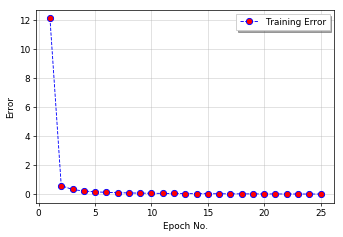

In [454]:
# ------ Plotting results ------ #
x = [i for i in total_error]
y = [total_error[i] for i in total_error]
fig,ax = plt.subplots(1,1,dpi=64)
ax.plot(x,y,'bo--',linewidth=1,markerfacecolor='red',markersize=7,label='Training Error')
ax.legend(loc='upper right',fancybox=False,shadow=True)
ax.grid(alpha=0.5)
ax.set_xlabel('Epoch No.')
ax.set_ylabel('Error')
if True:
    plt.savefig(inPath+'Figures/Training_error.png',dpi=400)

# ------ Calculating the prediction accuracy of network ------ #
known = np.array([i[-1] for i in X.data_test])
known_values = (known - known.mean()) / (known.max() - known.min())
outputs = np.asarray(known_values)
count_pos = 0 ; count_neg = 0
for i in range(len(known_values)):
    if (known_values[i]>0.0)and(outputs[i]>0.0):
        count_pos+=1
    elif (known_values[i]<0.0)and(outputs[i]<0.0):
        count_pos+=1
    else:
        print known_values[i],outputs[i]
        count_neg+=1
print 'Accuracy of network: %.1f %%'%(float(count_pos)/float(count_pos+count_neg)*100)